# <b>Section 1: Albums Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `datetime`: used to format date of data
- `matplotlib`: used to visualize data

In [5]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [62]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt

### <b><u>Step 2</u>: Import albums data from 'albums_data.tsv' file</b>

In [104]:
pd_album = pd.read_csv('../../data/albums_data.tsv', sep = '\t')

We have a small function to set our dataframe data left alignment. This make our table of data when display is more beautiful.

In [112]:
def left_align(df: DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles([dict(selector = 'th', props = [('text-align', 'center')])])
    return left_aligned_df

### <b><u>Step 3</u>: Exploratory Data Analysis</b>

Let's take a look at first 10 rows and the main characteristics of dataset.

In [105]:
left_align(pd_album.head(10))

,id,name,popularity,available_markets,release_date,total_tracks
0,0gr5OmB74UhoANEXwYT3gE,Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack],81,184,2022-11-20,1
1,3lZ0sW4znNieFHxGdyWXCj,22,60,183,2022-08-18,11
2,2AZXUAGWs90yNEUC4biubs,Chìm Sâu,52,183,2022-02-24,1
3,38JFpZ6hGFaQ4BUxT7XcI0,Chết Trong Em,50,184,2022-10-31,1
4,7q2bB2NNFlNbtqadbn55pL,dự báo thời tiết hôm nay mưa – Maxi Single,52,183,2022-11-22,3
5,5DZXXrAKNwD0c0Avrs5W9j,Tại Vì Sao,52,183,2022-09-23,1
6,2vki9hRAipW0SbK0A0c92W,Ngày Đầu Tiên,48,184,2022-02-11,1
7,4AitP1QgqnYpEpx8KY07IA,ThichThich,50,184,2022-07-24,1
8,3lZ0sW4znNieFHxGdyWXCj,22,60,182,2022-08-18,11
9,706NYXSqVRFvEn2L4GFahN,Có Đâu Ai Ngờ,47,183,2022-09-08,1


Let's read some description of each column to understand more clearly about data. All of these was included in `albums_data_des.csv`.

In [100]:
albums_data_des = pd.read_csv('../../data/description/albums_data_des.csv')
left_align(albums_data_des)

,column name,data type,meaning,example
0,id,string,The Spotify ID of the album,7lPoGKpCGgdKFAxpudhAH5
1,name,string,The name of the album,Speak Your Mind (Deluxe)
2,popularity,int,"""The popularity of the album. The value will be between 0 and 100 with 100 being the most popular""",72
3,available_markets,int,The number of markets (countries) which the album is available,183
4,release_date,datetime,The day when the album was released,"""2018-04-27"""
5,total_tracks,int,The number of tracks which the album contain,18


Next, let's check how many rows and columns in our DataFrame.

In [10]:
rows, columns = pd_album.shape
rows, columns

(3000, 6)

In [67]:
left_align(pd_album.describe())

,popularity,available_markets,total_tracks
count,3000.000000,3000.000000,3000.000000
mean,40.131000,165.323667,15.306333
std,25.359381,35.725346,24.414228
min,0.000000,1.000000,1.000000
25%,14.750000,181.000000,1.000000
50%,44.000000,183.000000,2.000000
75%,50.000000,183.000000,16.250000
max,95.000000,184.000000,141.000000


We are going to show information of the DataFrame.

In [12]:
pd_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   popularity         3000 non-null   int64 
 3   available_markets  3000 non-null   int64 
 4   release_date       3000 non-null   object
 5   total_tracks       3000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 140.8+ KB


Datatype of each columns.

In [13]:
dtypes = pd_album.dtypes
dtypes

id                   object
name                 object
popularity            int64
available_markets     int64
release_date         object
total_tracks          int64
dtype: object

Let's count the number of null and missing data.

In [14]:
pd_album.isna().sum()

id                   0
name                 0
popularity           0
available_markets    0
release_date         0
total_tracks         0
dtype: int64

Check how many albums are duplicated and need to be removed later.

In [15]:
print("There are", pd_album.duplicated().sum(), "rows are duplicated.") 

There are 2335 rows are duplicated.


We have recognized that the datatype of column `release_date` do not meet our need. Therefore, we have to convert release_date column from datetime type to Timestamp type.

In [16]:
pd_album['release_date'] = pd.to_datetime(pd_album['release_date'])
print('Ex:', pd_album['release_date'][1])

Ex: 2022-08-18 00:00:00


### <b><u>Step 4</u>: Count occurrences of each albums in 3000 rows of raw data</b>

- Count duplication of each albums by `pd.groupby()`.
- Drop irrelevant columns.
- Rename the counted value column from `size` to `occurrences`.
- Sort `occurrences` by descending order.

In [108]:
album_occur = pd_album.groupby(pd_album.columns.tolist()).size().reset_index()
album_occur = album_occur.drop(['popularity', 'available_markets', 'release_date', 'total_tracks'], axis = 1)
album_occur = album_occur.rename(columns = {0: 'occurrences'})
album_occur = album_occur.sort_values(by = 'occurrences', ascending = False, ignore_index = True)
left_align(album_occur.head(10))

,id,name,occurrences
0,4yP0hdKOZPNshxUOjY0cZj,After Hours,31
1,6nYfHQnvkvOTNHnOhDT3sr,BE,29
2,3euz4vS7ezKGnNSwgyvKcd,Positions,27
3,3OUXwE9nsupsKI3JY4Ml73,Winter Blues 2023,24
4,4DsRtPCkDwFLmdQnXbTL7f,Winter Vibes 2023,23
5,3ULu7EK5sl1zUdx2r7D15E,Rapitalove,20
6,3ULu7EK5sl1zUdx2r7D15E,Rapitalove,20
7,26jN76TbwKh8wHd7DY27hf,Blue Tequila,20
8,52MYcZ4Hzvy9vJcPicjfHZ,R,20
9,6jz6E152RTO3RfyjmdpAri,Okeokeoke,18


### <b><u>Step 5</u>: Drop duplication to clean the data</b>

In [18]:
albums_data = pd_album.drop_duplicates(subset = ['id'], keep = 'first', inplace = False)

Okay, it seems like our data are cleaner.

In [109]:
left_align(albums_data.head(10))

,id,name,popularity,available_markets,release_date,total_tracks
0,0gr5OmB74UhoANEXwYT3gE,Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack],81,184,2022-11-20 00:00:00,1
1,3lZ0sW4znNieFHxGdyWXCj,22,60,183,2022-08-18 00:00:00,11
2,2AZXUAGWs90yNEUC4biubs,Chìm Sâu,52,183,2022-02-24 00:00:00,1
3,38JFpZ6hGFaQ4BUxT7XcI0,Chết Trong Em,50,184,2022-10-31 00:00:00,1
4,7q2bB2NNFlNbtqadbn55pL,dự báo thời tiết hôm nay mưa – Maxi Single,52,183,2022-11-22 00:00:00,3
5,5DZXXrAKNwD0c0Avrs5W9j,Tại Vì Sao,52,183,2022-09-23 00:00:00,1
6,2vki9hRAipW0SbK0A0c92W,Ngày Đầu Tiên,48,184,2022-02-11 00:00:00,1
7,4AitP1QgqnYpEpx8KY07IA,ThichThich,50,184,2022-07-24 00:00:00,1
9,706NYXSqVRFvEn2L4GFahN,Có Đâu Ai Ngờ,47,183,2022-09-08 00:00:00,1
10,5Af8YESOWf6nK6BcLh3hkA,Mặt Mộc,48,184,2022-08-05 00:00:00,1


### <b><u>Step 6</u>: Data Visualization</b>

#### Visualize top 10 albums' occurrences among 3000 songs.

<AxesSubplot:ylabel='name'>

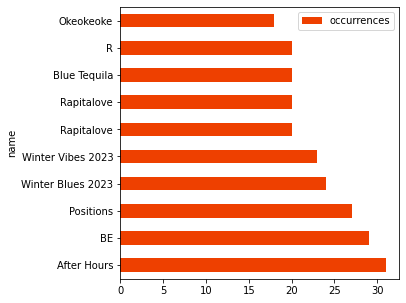

In [143]:
top10_occurrences = album_occur[['name', 'occurrences']].nlargest(n = 10, columns = ['occurrences'])
top10_occurrences.set_index('name').plot.barh(figsize = (5, 5), color = '#EE4000')

#### Visualize top 10 albums' total tracks.

<AxesSubplot:ylabel='name'>

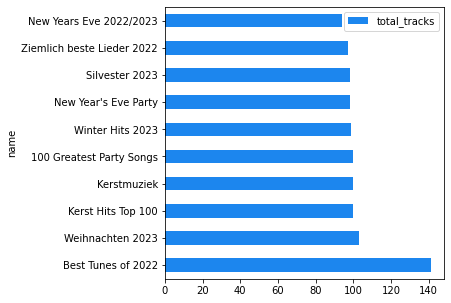

In [141]:
top10_notracks = albums_data[['name', 'total_tracks']].nlargest(n = 10, columns = ['total_tracks'])
top10_notracks.set_index('name').plot.barh(figsize = (5, 5), color = '#1C86EE')

#### List all albums have popularity over 80.

In [110]:
left_align(albums_data[albums_data['popularity'] > 80].sort_values(by = ['popularity'], ascending = False))

,id,name,popularity,available_markets,release_date,total_tracks
134,151w1FgRZfnKZA9FEcg9Z3,Midnights,95,183,2022-10-21 00:00:00,13
400,07w0rG5TETcyihsEIZR3qG,SOS,95,184,2022-12-09 00:00:00,23
403,5r36AJ6VOJtp00oxSkBZ5h,Harry's House,91,183,2022-05-20 00:00:00,13
276,7txGsnDSqVMoRl6RQ9XyZP,HEROES & VILLAINS,90,182,2022-12-02 00:00:00,15
1035,6s84u2TUpR3wdUv4NgKA2j,SOUR,89,184,2021-05-21 00:00:00,11
2037,4yP0hdKOZPNshxUOjY0cZj,After Hours,88,183,2020-03-20 00:00:00,14
126,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88,183,2022-09-22 00:00:00,1
310,7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),86,182,2022-08-26 00:00:00,2
113,2hEnymoejldpuxSdTnkard,SMITHEREENS,86,183,2022-11-04 00:00:00,9
21,6al2VdKbb6FIz9d7lU7WRB,Proof,85,183,2022-06-10 00:00:00,35


#### Visualize top 10 albums' popularity.

<AxesSubplot:ylabel='name'>

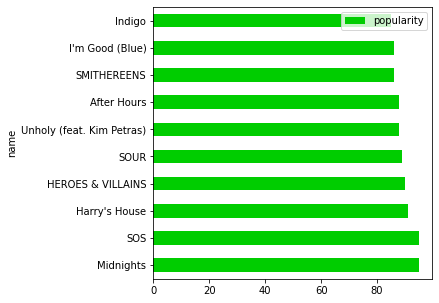

In [146]:
top10_popularity = albums_data[['name', 'popularity']].nlargest(n = 10, columns = ['popularity'])
top10_popularity.set_index('name').plot.barh(figsize = (5, 5), color = '#00CD00')

### <b><u>Step 7</u>: Advanced exploration on the dataset</b>

#### Show all existing albums' releasing-years.

In [24]:
albums_data['release_date'].dt.year.sort_values().unique()

array([2020, 2021, 2022])

Visualize the number of albums released each years from 1960 to 2022.

<AxesSubplot:>

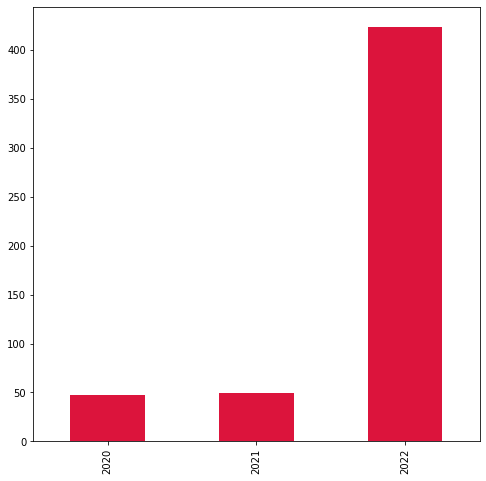

In [140]:
num_albums_each_years = albums_data['release_date'].dt.year.value_counts().sort_index(ascending = True)
num_albums_each_years.plot.bar(figsize = (8, 8), color = 'crimson')

#### <b>The album with the highest popularity in 2022</b>
- Get all albums which released in 2022.

In [123]:
albums_2022 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2022)
albums_2022.dropna(inplace = True)
albums_2022 = albums_2022.astype({'popularity': 'int32'})
left_align(albums_2022.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10))

,id,name,popularity,release_date
0,07w0rG5TETcyihsEIZR3qG,SOS,95,2022-12-09 00:00:00
1,151w1FgRZfnKZA9FEcg9Z3,Midnights,95,2022-10-21 00:00:00
2,5r36AJ6VOJtp00oxSkBZ5h,Harry's House,91,2022-05-20 00:00:00
3,7txGsnDSqVMoRl6RQ9XyZP,HEROES & VILLAINS,90,2022-12-02 00:00:00
4,0gX9tkL5njRax8ymWcXARi,Unholy (feat. Kim Petras),88,2022-09-22 00:00:00
5,2hEnymoejldpuxSdTnkard,SMITHEREENS,86,2022-11-04 00:00:00
6,7M842DMhYVALrXsw3ty7B3,I'm Good (Blue),86,2022-08-26 00:00:00
7,6al2VdKbb6FIz9d7lU7WRB,Proof,85,2022-06-10 00:00:00
8,08HCdXZVN72S2vpIT9DKhU,Indigo,85,2022-12-02 00:00:00
9,4LVa9bljQRvLYpWr8qyaXs,Takin' It Back,84,2022-10-21 00:00:00


- Query to get the album with the highest popularity in 2022.

In [124]:
display(albums_2022.loc[(albums_2022['popularity'] >= albums_2022['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
134,151w1FgRZfnKZA9FEcg9Z3,Midnights,95,2022-10-21
400,07w0rG5TETcyihsEIZR3qG,SOS,95,2022-12-09


#### <b>The album with the highest popularity in 2021</b>
- Get all albums which released in 2021.

In [126]:
albums_2021 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2021)
albums_2021.dropna(inplace = True)
albums_2021 = albums_2021.astype({'popularity': 'int32'})
left_align(albums_2021.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10))

,id,name,popularity,release_date
0,6s84u2TUpR3wdUv4NgKA2j,SOUR,89,2021-05-21 00:00:00
1,18CtLoAMTr7F8ngtuM6D8i,Until I Found You,77,2021-09-01 00:00:00
2,0VaHnwzDug4AcDkejYDUl5,Sunroof,77,2021-12-03 00:00:00
3,06mXfvDsRZNfnsGZvX2zpb,Music Of The Spheres,76,2021-10-15 00:00:00
4,1OnzqJTL9bwe4kvaLxRYxt,Kiss Me More (feat. SZA),69,2021-04-09 00:00:00
5,4210mSQ3r10AsJMZEYAH5l,"Our Beloved Summer (Original Television Soundtrack), Pt. 5",69,2021-12-24 00:00:00
6,44CdsgXhU5R2esprq0tf43,Angel Baby,69,2021-09-09 00:00:00
7,1HJ34zQqSqNvZeO2W6dE01,Pano,68,2021-12-06 00:00:00
8,5lVImnUah94yoxXy2H1qo7,Reckless,68,2021-06-04 00:00:00
9,1DKgZeAYrjslAPZVMe6EFt,4 ONLY,67,2021-09-09 00:00:00


- Query to get the album with the highest popularity in 2021.

In [131]:
display(albums_2021.loc[(albums_2021['popularity'] >= albums_2021['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
1035,6s84u2TUpR3wdUv4NgKA2j,SOUR,89,2021-05-21


#### <b>The album with the highest popularity in 2020</b>
- Get all albums which released in 2020.

In [133]:
albums_2020 = albums_data[['id', 'name', 'popularity', 'release_date']].where(albums_data['release_date'].dt.year == 2020)
albums_2020.dropna(inplace = True)
albums_2020 = albums_2020.astype({'popularity': 'int32'})
left_align(albums_2020.sort_values(by = 'popularity', ascending = False, ignore_index = True).head(10))

,id,name,popularity,release_date
0,4yP0hdKOZPNshxUOjY0cZj,After Hours,88,2020-03-20 00:00:00
1,2CMlkzFI2oDAy5MbyV7OV5,Kid Krow,82,2020-03-20 00:00:00
2,3euz4vS7ezKGnNSwgyvKcd,Positions,81,2020-10-30 00:00:00
3,1OojCidx0eoPKch2M0Kz31,HELP EVER HURT NEVER,78,2020-05-20 00:00:00
4,6nYfHQnvkvOTNHnOhDT3sr,BE,78,2020-11-20 00:00:00
5,5mUdh6YWnUvf0MfklEk1oi,Stuck with U,71,2020-05-08 00:00:00
6,3Qj2vsFzmaB8jcH6Q60WIG,The Prelude,63,2020-07-17 00:00:00
7,0vyG4FyBIHURVJjQT0RDvG,Abyss,62,2020-12-03 00:00:00
8,1tCQC9HuRvujLuSe2sgf2S,Past Lives,60,2020-09-21 00:00:00
9,5O0csa2fMgpO8DwEhwThRV,bao tiền một mớ bình yên?,52,2020-01-01 00:00:00


- Query to get the album with the highest popularity in 2020.

In [134]:
display(albums_2020.loc[(albums_2020['popularity'] >= albums_2020['popularity'].max()), ['id', 'name', 'popularity', 'release_date']])

,id,name,popularity,release_date
2037,4yP0hdKOZPNshxUOjY0cZj,After Hours,88,2020-03-20


#### Visualize the number of albums based on popularity.

<AxesSubplot:>

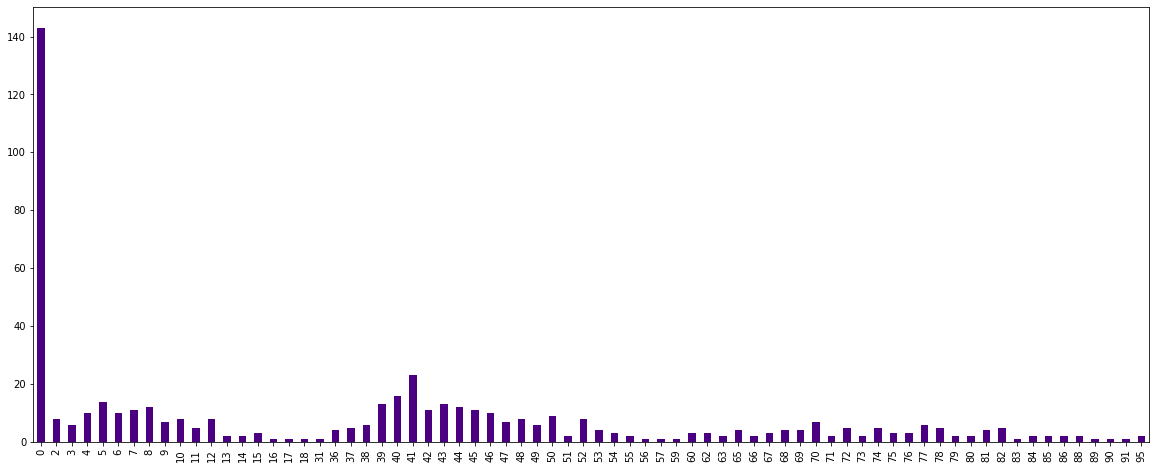

In [36]:
num_albums_each_popularity = albums_data['popularity'].value_counts().sort_index(ascending = True)
num_albums_each_popularity.plot.bar(figsize = (20, 8), color = 'indigo')